# Численное решение задачи Коши
# для обыкновенных дифференциальных уравнений

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f(x, y):
    return x*y

h = 0.1
n = 11
x = np.linspace(0, 1, num=n)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [4]:
y1 = np.zeros(n)
y1[0] = 1
for i in range(1, n):
    y1[i] = y1[i - 1] + h * f(x[i - 1], y1[i - 1])
print("Метод Эйлера - ", y1)

Метод Эйлера -  [1.         1.         1.01       1.0302     1.061106   1.10355024
 1.15872775 1.22825142 1.31422902 1.41936734 1.5471104 ]


In [5]:
y2 = np.zeros(n)
y2[0] = 1
for i in range(1, n):
    y2[i] = y2[i - 1] + h * (f(x[i - 1], y2[i - 1]) + f(x[i - 1] + h, y1[i])) / 2
print("Модифицированный метод Эйлера - ", y2)

Модифицированный метод Эйлера -  [1.         1.005      1.020125   1.04577925 1.08268806 1.13193058
 1.19499067 1.27382919 1.37098238 1.4896932  1.63408491]


In [6]:
y3 = np.zeros(n)
y3[0] = 1
for i in range(1, n):
    k0 = h * f(x[i - 1], y3[i - 1])
    k1 = h * f(x[i - 1] + h / 2, y3[i - 1] + k0 / 2)
    k2 = h * f(x[i - 1] + h / 2, y3[i - 1] + k1 / 2)
    k3 = h * f(x[i - 1] + h, y3[i - 1] + k2)
    y3[i] = y3[i - 1] + (k0 + 2 * k1 + 2 * k2 + k3) / 6
print("Метод Рунге-Кутта - ", y3)

Метод Рунге-Кутта -  [1.         1.00501252 1.02020134 1.04602786 1.08328706 1.13314845
 1.19721735 1.27762128 1.37712769 1.49930236 1.64872101]


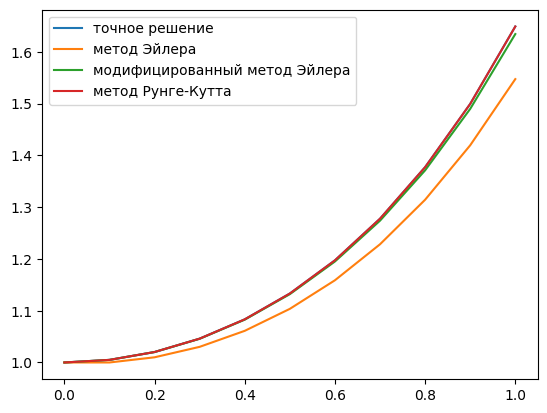

In [7]:
plt.plot(x, np.exp(x**2 / 2), label="точное решение")
plt.plot(x, y1, label="метод Эйлера")
plt.plot(x, y2, label="модифицированный метод Эйлера")
plt.plot(x, y3, label="метод Рунге-Кутта")
plt.legend()
plt.show()